## 確認套件已經安裝 & Get data

In [1]:
from __future__ import print_function
!pip install -q keras
import keras
from google.colab import files
import numpy as np
from past.builtins import execfile
import numpy as np
import os

from keras.utils import np_utils
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## 請將本機端的資料 "pkgo_city66_cass5_v1.csv" 上傳到 colab 環境

In [0]:
if not os.path.exists("pkgo_city66_class5_v1.csv"):
  uploaded = files.upload()

def readInput(file):
  ''' Read input files '''
  my_data = np.genfromtxt(file, delimiter=',',skip_header=1)

  ''' The first column to the 199th column is used as input features '''
  X_train = my_data[:,0:200]
  X_train = X_train.astype('float32')

  ''' The 200-th column is the answer '''
  y_train = my_data[:,200]
  y_train = y_train.astype('int')

  ''' Convert to one-hot encoding '''
  Y_train = np_utils.to_categorical(y_train,5)

  ''' Shuffle training data '''
  X_train,Y_train = shuffle(X_train,Y_train,random_state=100)
  return X_train, Y_train

X_train, Y_train = readInput(file="pkgo_city66_class5_v1.csv")

## 開始建立第一個模型 
### (資料已經先替各位做過簡單的預處理囉)

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               25728     
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1285      
_________________________________________________________________
activation_6 (Activation)    (None, 5)                 0         
Total para

1652/1652 [==============================] - 0s 126us/step - loss: 0.1340 - acc: 0.5163 - val_loss: 0.1334 - val_acc: 0.5163
Epoch 11/30
1652/1652 [==============================] - 0s 119us/step - loss: 0.1340 - acc: 0.5163 - val_loss: 0.1334 - val_acc: 0.5163
Epoch 12/30
1652/1652 [==============================] - 0s 130us/step - loss: 0.1340 - acc: 0.5163 - val_loss: 0.1332 - val_acc: 0.5163
Epoch 13/30
1652/1652 [==============================] - 0s 112us/step - loss: 0.1339 - acc: 0.5163 - val_loss: 0.1332 - val_acc: 0.5163
Epoch 14/30
1652/1652 [==============================] - 0s 122us/step - loss: 0.1338 - acc: 0.5163 - val_loss: 0.1331 - val_acc: 0.5163
Epoch 15/30
1652/1652 [==============================] - 0s 117us/step - loss: 0.1338 - acc: 0.5163 - val_loss: 0.1330 - val_acc: 0.5163
Epoch 16/30
1652/1652 [==============================] - 0s 119us/step - loss: 0.1337 - acc: 0.5163 - val_loss: 0.1330 - val_acc: 0.5163
Epoch 17/30
1652/1652 [==============================

1652/1652 [==============================] - 0s 126us/step - loss: 0.1333 - acc: 0.5163 - val_loss: 0.1323 - val_acc: 0.5163
Epoch 26/30
1652/1652 [==============================] - 0s 129us/step - loss: 0.1333 - acc: 0.5163 - val_loss: 0.1323 - val_acc: 0.5163
Epoch 27/30
1652/1652 [==============================] - 0s 142us/step - loss: 0.1332 - acc: 0.5163 - val_loss: 0.1322 - val_acc: 0.5163
Epoch 28/30
1652/1652 [==============================] - 0s 124us/step - loss: 0.1331 - acc: 0.5163 - val_loss: 0.1321 - val_acc: 0.5163
Epoch 29/30
1652/1652 [==============================] - 0s 124us/step - loss: 0.1331 - acc: 0.5163 - val_loss: 0.1321 - val_acc: 0.5163
Epoch 30/30
1652/1652 [==============================] - 0s 118us/step - loss: 0.1331 - acc: 0.5163 - val_loss: 0.1320 - val_acc: 0.5163


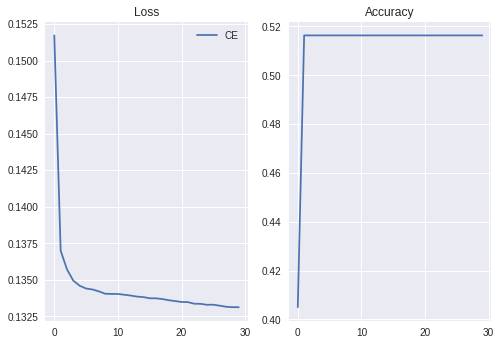

In [5]:
#@title Loss Function selection { vertical-output: true, display-mode: "both" }
loss_option = "mean_squared_error" #@param ["mean_squared_error", "categorical_crossentropy"]


x_input = Input(shape = [X_train.shape[1]])

x = Dense(128)(x_input)
x = Activation('sigmoid')(x)

x = Dense(256)(x)
x = Activation('sigmoid')(x)

x = Dense(5)(x)
out = Activation('softmax')(x)

sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

model = Model(inputs=[x_input], outputs=[out])

model.compile(loss=loss_option,
				optimizer=sgd,
				metrics=['accuracy'])
model.summary()

batch_size = 16
epochs = 30

history = model.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=1,
							shuffle=True,
              validation_split=0.1)

loss	= history.history.get('loss')
acc 	= history.history.get('acc')

''' Visualize the loss and accuracy of both models'''
plt.figure(0)
plt.subplot(121)
plt.plot(range(len(loss)), loss,label='CE')
plt.title('Loss')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(range(len(acc)), acc,label='CE')
plt.title('Accuracy')
plt.show()

## 同時比較多種 loss 對訓練結果之差異

Running model, loss = mean_squared_error
Running model, loss = categorical_crossentropy
Running model, loss = mean_absolute_error


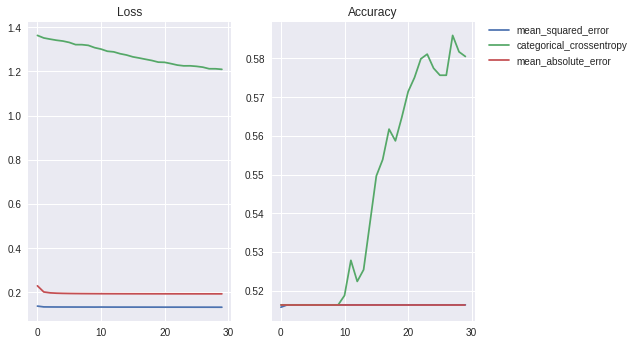

In [6]:
#@title Losses Comparison { vertical-output: true, display-mode: "both" }
losses = ["mean_squared_error", "categorical_crossentropy", "mean_absolute_error"] #@param {type:"string"}


import keras.backend as K
batch_size = 16
epochs = 30
all_loss, all_acc = [], []

for loss_option in losses:
  K.clear_session()
  print("Running model, loss = %s" % loss_option)
  
  x_input = Input(shape = [X_train.shape[1]])
  x = Dense(128)(x_input)
  x = Activation('sigmoid')(x)

  x = Dense(256)(x)
  x = Activation('sigmoid')(x)

  x = Dense(5)(x)
  out = Activation('softmax')(x)

  sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

  model = Model(inputs=[x_input], outputs=[out])

  model.compile(loss=loss_option,
          optimizer=sgd,
          metrics=['accuracy'])

  history = model.fit(X_train, Y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                shuffle=True,
                validation_split=0.1)

  loss	= history.history.get('loss')
  acc 	= history.history.get('acc')
  
  all_loss.append(loss)
  all_acc.append(acc)

''' Visualize the loss and accuracy of both models'''
plt.figure(0)
plt.subplot(121)
for k in range(len(losses)):
  plt.plot(range(len(all_loss[k])), all_loss[k],label=losses[k])
plt.title('Loss')
plt.subplot(122)
for k in range(len(losses)):
  plt.plot(range(len(all_acc[k])), all_acc[k],label=losses[k])
plt.title('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()